In [1]:
# Import standard modules
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd

# Import own moduls
import svm_util as svm
import lls

# Set seed
np.random.seed(42)

In [2]:
# Set parameter for the exponential distribution
lam_1 = 4
lam_2 = .5

# Draw 20 two-dim. vectors from the exponential distribution
np.random.seed(42)
exp_draws_1 = np.random.exponential(scale=1/lam_1, size=(20, 2))
exp_draws_2 = np.random.exponential(scale=1/lam_2, size=(20, 2))

# Label of the data for classification
y = np.zeros(40)
y[0:20] = -1
y[20:40] = 1

# Construct the array X 
X = np.vstack((exp_draws_1, exp_draws_2))

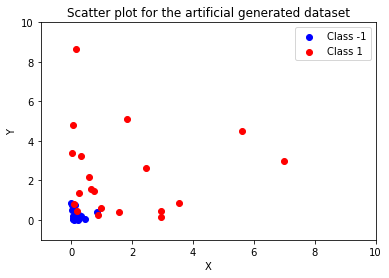

In [3]:
# Scatter plot for the feature data 
plt.figure()
plt.scatter(exp_draws_1[:,0], exp_draws_1[:,1], color = "blue", label = "Class -1")
plt.scatter(exp_draws_2[:,0], exp_draws_2[:,1], color = "red", label = "Class 1")

plt.title('Scatter plot for the artificial generated dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.legend()
plt.show()

SVM Classification for C=0.01
--------------------------------
Number of support vectors:  36
Number of margin vectors:  2
Accuracy on training data set:  0.65


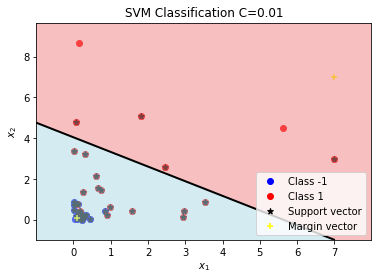

SVM Classification for C=1.00
--------------------------------
Number of support vectors:  13
Number of margin vectors:  3
Accuracy on training data set:  0.925


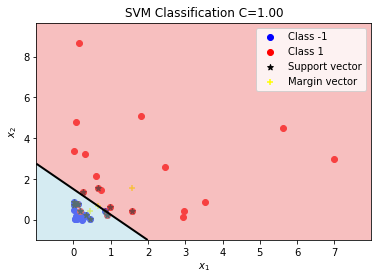

SVM Classification for C=100.00
--------------------------------
Number of support vectors:  9
Number of margin vectors:  4
Accuracy on training data set:  0.925


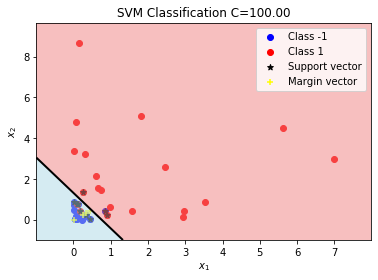

In [4]:
# Set the number of iterations and values for C
C_values  = [0.01, 1, 100]

x1_max = max(X[:,0])
x1_min = min(X[:,0])
x2_max = max(X[:,1])
x2_min = min(X[:,1])

x1_vals, x2_vals = np.meshgrid(np.linspace(x1_min -1 , x1_max +1, 300),
                       np.linspace(x2_min-1, x2_max+1, 300))


for C in C_values: 
    # Run the SVM SMO
    beta, b = svm.SMO(X, y, C, n_iter=10000)
    # Transform the beta coefficients to alpha
    alpha = svm.transform_coefficients(X,y, beta, b)
    # Compute the separating hyperplane
    Z = alpha[0] + alpha[1] * x1_vals + alpha[2] * x2_vals

    # Obtain the support vectors beta_k > 0 and margin vectors 
    support_indices = np.where(beta > 0)[0]
    margin_indices = np.where((C > beta)  & (beta >0))[0]
    # Extract the support and margin vectors
    support_vectors = X[support_indices]
    margin_vectors = X[margin_indices]

    # Print the support and margin vectors
    print('SVM Classification for C=%.2f' %C)
    print('--------------------------------')
    print('Number of support vectors: ', len(support_vectors))
    print('Number of margin vectors: ', len(margin_vectors))
    print('Accuracy on training data set: ', svm.accuracy(svm.confusion_matrix_svm(X, y, X, y, beta, b)))

    # Scatter plot with separating hyperplane
    plt.figure()
    plt.scatter(X[0:20,0], X[0:20,1], color = "blue", label = "Class -1")
    plt.scatter(X[20:40,0], X[20:40,1], color = "red", label = "Class 1")
    plt.scatter(support_vectors[:,0], support_vectors[:,1], marker='*' , color = 'black', label = 'Support vector')
    plt.scatter(margin_vectors[:,0], margin_vectors[:,0], marker='+', color = 'yellow', label = 'Margin vector')
    plt.contour(x1_vals, x2_vals, Z, levels = [0], colors='k', linestyles='-', linewidths=2)
    plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, 0, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('SVM Classification C=%.2f' %C)
    plt.legend()
    plt.show()

LLS Classification
--------------------------------
Accuracy on training data:  0.85


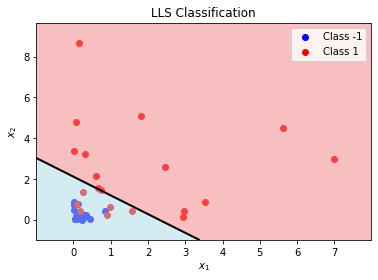

In [5]:
# Call LLS on the traning data set construced in Task 2.2
alpha_lls_training = lls.linear_least_squares(X ,y)
# Calcualte the hyperplane
Z = alpha_lls_training[0] + alpha_lls_training[1] * x1_vals + alpha_lls_training[2] * x2_vals
threshold = 0
print('LLS Classification')
print('--------------------------------')
print('Accuracy on training data: ', lls.accuracy(lls.confusion_matrix_lls(X, y, alpha_lls_training, threshold = 0)))
# Scatter plot with separating hyperplane
plt.figure()
plt.scatter(X[0:20,0], X[0:20,1], color = "blue", label = "Class -1")
plt.scatter(X[20:40,0], X[20:40,1], color = "red", label = "Class 1")
plt.contour(x1_vals, x2_vals, Z, levels = [threshold], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, threshold, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('LLS Classification')
plt.legend()
plt.show()

In [6]:
# Task 2.2
# Set parameter for the exponential distribution
lam_1 = 4
lam_2 = .5

# Draw 20 two-dim. vectors from the exponential distribution
np.random.seed(42)
exp_draws_1_test = np.random.exponential(scale=1/lam_1, size=(1000, 2))
exp_draws_2_test = np.random.exponential(scale=1/lam_2, size=(1000, 2))

# Labeling of the data for classification
y_test = np.zeros(2000)
y_test[0:1000] = -1
y_test[1000:2000] = 1
# Construct the array X
X_test = np.vstack((exp_draws_1_test, exp_draws_2_test))

# Copy the traing data from X and y
X_training = X.copy()
y_training = y.copy()

In [7]:
# Compute the accuracy for C = 0.01, 1, 100
for C in C_values: 
    beta, b = svm.SMO(X, y, C, n_iter=10000)
    print('Accuracy results for SVM Classification for C=%.2f' %C)
    print('----------------')
    print('Accuracy on training data: ')
    print(svm.accuracy(svm.confusion_matrix_svm(X, y, X, y, beta, b)))
    print('')
    print('Accuracy on test data: ')
    print(svm.accuracy(svm.confusion_matrix_svm(X_test, y_test, X, y, beta, b)))
    print('')

# Compute the accuracy LLS
print('Accuracy results for LLS Classification')
print('----------------')
print('Accuracy on training data: ')
print(lls.accuracy(lls.confusion_matrix_lls(X, y, alpha_lls_training, threshold = 0)))
# Print results for the test data 
print('Accuracy on test data: ')
print(lls.accuracy(lls.confusion_matrix_lls(X_test, y_test, alpha_lls_training, threshold=0)))


Accuracy results for SVM Classification for C=0.01
----------------
Accuracy on training data: 
0.65

Accuracy on test data: 
0.66

Accuracy results for SVM Classification for C=1.00
----------------
Accuracy on training data: 
0.925

Accuracy on test data: 
0.9035

Accuracy results for SVM Classification for C=100.00
----------------
Accuracy on training data: 
0.925

Accuracy on test data: 
0.8955

Accuracy results for LLS Classification
----------------
Accuracy on training data: 
0.85
Accuracy on test data: 
0.848


SVM Classification for C=0.01
--------------------------------
Number of support vectors:  36
Number of margin vectors:  2
Accuracy on training data set:  0.65


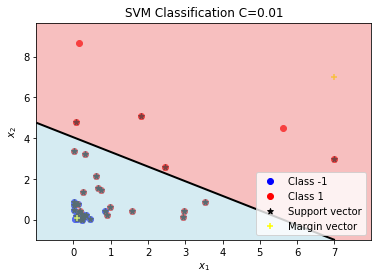

SVM Classification for C=1.00
--------------------------------
Number of support vectors:  13
Number of margin vectors:  3
Accuracy on training data set:  0.925


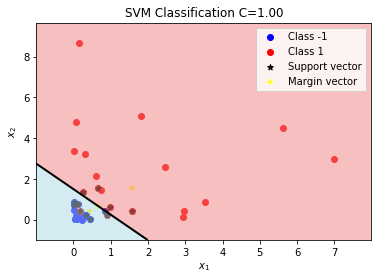

SVM Classification for C=100.00
--------------------------------
Number of support vectors:  8
Number of margin vectors:  3
Accuracy on training data set:  0.925


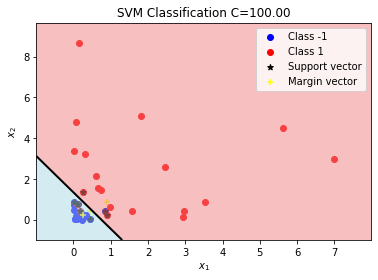

In [8]:
# We now rerun the last exericse with the new SMO with KKT heuristic
# Set the number of iterations and values for C
C_values  = [0.01, 1, 100]

x1_max = max(X[:,0])
x1_min = min(X[:,0])
x2_max = max(X[:,1])
x2_min = min(X[:,1])

x1_vals, x2_vals = np.meshgrid(np.linspace(x1_min -1 , x1_max +1, 300),
                       np.linspace(x2_min-1, x2_max+1, 300))


for C in C_values: 
    # Run the SVM SMO
    beta, b = svm.SMO_wKKT(X, y, C, n_iter=10000)
    # Transform the beta coefficients to alpha
    alpha = svm.transform_coefficients(X,y, beta, b)
    # Compute the separating hyperplane
    Z = alpha[0] + alpha[1] * x1_vals + alpha[2] * x2_vals

    # Obtain the support vectors beta_k > 0 and margin vectors 
    support_indices = np.where(beta > 0)[0]
    margin_indices = np.where((C > beta)  & (beta >0))[0]
    # Extract the support and margin vectors
    support_vectors = X[support_indices]
    margin_vectors = X[margin_indices]

    # Print the support and margin vectors
    print('SVM Classification for C=%.2f' %C)
    print('--------------------------------')
    print('Number of support vectors: ', len(support_vectors))
    print('Number of margin vectors: ', len(margin_vectors))
    print('Accuracy on training data set: ', svm.accuracy(svm.confusion_matrix_svm(X, y, X, y, beta, b)))

    # Scatter plot with separating hyperplane
    plt.figure()
    plt.scatter(X[0:20,0], X[0:20,1], color = "blue", label = "Class -1")
    plt.scatter(X[20:40,0], X[20:40,1], color = "red", label = "Class 1")
    plt.scatter(support_vectors[:,0], support_vectors[:,1], marker='*' , color = 'black', label = 'Support vector')
    plt.scatter(margin_vectors[:,0], margin_vectors[:,0], marker='+', color = 'yellow', label = 'Margin vector')
    plt.contour(x1_vals, x2_vals, Z, levels = [0], colors='k', linestyles='-', linewidths=2)
    plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, 0, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('SVM Classification C=%.2f' %C)
    plt.legend()
    plt.show()


In [9]:
# Compute the accuracy for C = 0.01, 1, 100
for C in C_values: 
    beta, b = svm.SMO_wKKT(X,y,C,n_iter=10000)
    print('Accuracy results for SVM Classification for C=%.2f' %C)
    print('----------------')
    print('Accuracy on training data: ')
    print(svm.accuracy(svm.confusion_matrix_svm(X, y, X, y, beta, b)))
    print('')
    print('Accuracy on test data: ')
    print(svm.accuracy(svm.confusion_matrix_svm(X_test, y_test, X, y, beta, b)))
    print('')

# Compute the accuracy LLS
print('Accuracy results for LLS Classification')
print('----------------')
print('Accuracy on training data: ')
print(lls.accuracy(lls.confusion_matrix_lls(X, y, alpha_lls_training, threshold = 0)))
# Print results for the test data 
print('Accuracy on test data: ')
print(lls.accuracy(lls.confusion_matrix_lls(X_test, y_test, alpha_lls_training, threshold=0)))

Accuracy results for SVM Classification for C=0.01
----------------
Accuracy on training data: 
0.65

Accuracy on test data: 
0.66

Accuracy results for SVM Classification for C=1.00
----------------
Accuracy on training data: 
0.925

Accuracy on test data: 
0.9035

Accuracy results for SVM Classification for C=100.00
----------------
Accuracy on training data: 
0.925

Accuracy on test data: 
0.896

Accuracy results for LLS Classification
----------------
Accuracy on training data: 
0.85
Accuracy on test data: 
0.848


In [10]:
# Task 2.5
# Generate the feature draws 
draws_1 = []
while len(draws_1) < 50:
    unif_draw = list(np.random.uniform([-1, -1], [1, 1], (2,)))
    if np.linalg.norm(unif_draw) < 1:
        draws_1.append(unif_draw)
draws_1 = np.array(draws_1)
        
draws_2 = []
while len(draws_2) < 50:
    unif_draw = list(np.random.uniform([-2, -2], [2, 2], (2,)))
    if np.linalg.norm(unif_draw) > 1 and np.linalg.norm(unif_draw) < 2:
        draws_2.append(unif_draw)
draws_2 = np.array(draws_2)

# Stack the draws into numpy array
X = np.vstack((draws_1, draws_2))

# Generate the classified data
y = np.zeros(100)
y[0:50] = -1
y[50:100] = 1

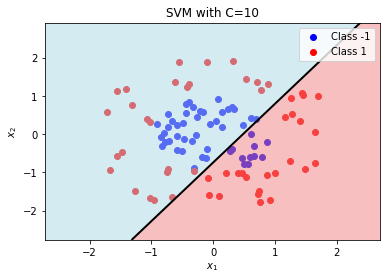

In [11]:
# Run the SVM 
C = 10
beta, b = svm.SMO(X, y, C, n_iter=10000)
alpha = svm.transform_coefficients(X,y, beta, b)

x1_max = max(X[:,0])
x1_min = min(X[:,0])
x2_max = max(X[:,1])
x2_min = min(X[:,1])


# Scatter plot and hyperplane from SVM
x1_vals, x2_vals = np.meshgrid(np.linspace(x1_min-1, x1_max +1, 300),
                       np.linspace(x2_min-1, x2_max+1, 300))

# Calculate the hyperplane
Z = alpha[0] + alpha[1] * x1_vals + alpha[2] * x2_vals
threshold = 0

plt.figure()
plt.scatter(X[0:50,0], X[0:50,1], color = "blue", label = "Class -1")
plt.scatter(X[50:100,0], X[50:100,1], color = "red", label = "Class 1")
plt.contour(x1_vals, x2_vals, Z, levels = [threshold], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, threshold, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM with C=10')
plt.legend()
plt.show()

In [12]:
# Definition of the feature map 
def feature_map(t):
    '''
    Feature map
    *Args:
        t: shape (n_feature,)
    Returns: function value of feature map
    '''
    phi = np.zeros(3)
    phi[0] = t[0]
    phi[1] = t[1]
    phi[2] = t[0]**2 + t[1]**2
    return phi

def transform_data(feature_map, dim, X):
    '''
    Function to transform the input data by the feature map
    *Args:
        feature_map:
        dim: dimension of the transformed data by feature map
        X: Input data
    Returns: function value of feature map
    '''
    # Transform the data by the feature map 
    n_obs = X.shape[0]
    X_transformed = np.zeros((n_obs, dim))
    for i in range(0, n_obs):
        # Apply the feature map to i-th observation
        X_transformed[i] = feature_map(X[i])
    return X_transformed 


    

In [13]:
# Run the SVM on the transformed data for C=10
X_transformed = transform_data(feature_map, 3, X)

beta_trans, b_trans = svm.SMO(X_transformed, y, C=10, n_iter=10000)
alpha_trans = svm.transform_coefficients(X_transformed,y, beta_trans, b_trans)

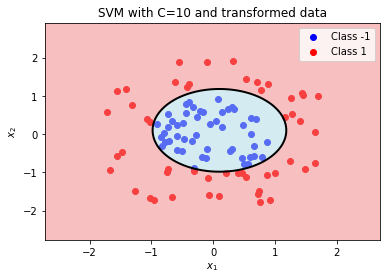

In [14]:
# Calculate the hyperplane
Z_trans = alpha_trans[0] + alpha_trans[1] * x1_vals + alpha_trans[2] * x2_vals + alpha_trans[3]*(x1_vals**2 + x2_vals**2)

# Obtain the support vectors beta_k > 0 and margin vectors 
support_indices_trans = np.where(beta_trans > 0)[0]
margin_indices_trans = np.where((C > beta_trans)  & (beta_trans >0))[0]
# Extract the support and margin vectors
support_vectors_trans = X[support_indices_trans]
margin_vectors_trans = X[margin_indices_trans]

# Scatter plot and separation curve
plt.figure()
plt.scatter(X[0:50,0], X[0:50,1], color = "blue", label = "Class -1")
plt.scatter(X[50:100,0], X[50:100,1], color = "red", label = "Class 1")
plt.contour(x1_vals, x2_vals, Z_trans, levels = [0], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z_trans, levels=[-np.inf, 0, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
#plt.scatter(support_vectors_trans[:,0], support_vectors_trans[:,1], marker='*' , color = 'black', label = 'Support vector')
#plt.scatter(margin_vectors_trans[:,0], margin_vectors_trans[:,0], marker='+', color = 'yellow', label = 'Margin vector')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM with C=10 and transformed data')
plt.legend()
plt.show()

In [15]:
# Define the Gaussian kernel
def gauss_kernel(t, x, sigma=1):
    '''
    *Args:
        t: shape (n_feature,)
        x: shape (n_feature,)
        sigma: Standard deviation from Gaussian Distribution, default is set to sigma = 1
    Returns: 
        eval: evaulation of the Gaussian kernel 
    '''
    eval = np.exp( -(np.linalg.norm(t - x)**2)/(2 * sigma**2)   )
    return eval

In [16]:
# Run the SVM with Gaussian kernel as kernel function 
iter = 10000
C = 10
beta_w_kernel, b_w_kernel = svm.SMO_wkernel(gauss_kernel, X, y, C, iter)

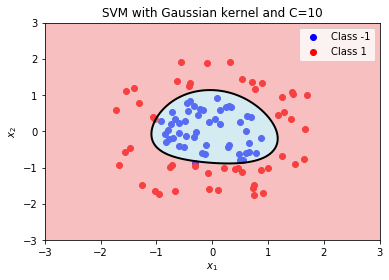

In [17]:
# Create meshgrid
x1_vals, x2_vals = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid_points = np.c_[x1_vals.ravel(), x2_vals.ravel()]  

# Evaluate f on each grid point
Z_flat = np.apply_along_axis(lambda t: svm.f_wkernel(t, K=gauss_kernel, X=X, y=y, beta=beta_w_kernel, b=b_w_kernel), 1, grid_points)
Z_trans = Z_flat.reshape(x1_vals.shape)

# Obtain the support vectors beta_k > 0 and margin vectors 
support_indices_wkernel = np.where(beta_w_kernel > 0)[0]
margin_indices_wkernel = np.where((C > beta_w_kernel)  & (beta_w_kernel >0))[0]
# Extract the support and margin vectors
support_vectors_wkernel = X[support_indices_wkernel]
margin_vectors_wkernel = X[margin_indices_wkernel]


# Scatter plot and separation curve
plt.figure()
plt.scatter(X[0:50,0], X[0:50,1], color = "blue", label = "Class -1")
plt.scatter(X[50:100,0], X[50:100,1], color = "red", label = "Class 1")
# Add the support and margin vectors
plt.contour(x1_vals, x2_vals, Z_trans, levels = [0], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z_trans, levels=[-np.inf, 0, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
#plt.scatter(support_vectors_wkernel[:,0], support_vectors_wkernel[:,1], marker='*' , color = 'black', label = 'Support vector')
#plt.scatter(margin_vectors_wkernel[:,0], margin_vectors_wkernel[:,0], marker='+', color = 'yellow', label = 'Margin vector')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM with Gaussian kernel and C=10')
plt.legend()
plt.show()

In [18]:
import os
import gzip
from urllib.request import urlretrieve
import torch
import sklearn as sk

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

import struct

In [19]:
# Set the directory where the dataset MNIST is located
base_dir = '/Users/Uriel/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 02/MNIST/processed'

# Load the training and test data
file_name_training = 'training.pt'
training_data = torch.load(os.path.join(base_dir, file_name_training))
file_name_test = 'test.pt'
test_data  = torch.load(os.path.join(base_dir, file_name_test))

# Check the data type
print('Data type of the training data:', type(training_data))
# Convert to numpy array
X_train, y_train = training_data
X_train = X_train.cpu().numpy()
y_train = y_train.cpu().numpy()


Data type of the training data: <class 'tuple'>


In [20]:
def load_mnist_images(filename):
    """Load MNIST images from the binary file format"""
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)
    return images / 255.0  # normalize to [0, 1]

def load_mnist_labels(filename):
    """Load MNIST labels from the binary file format"""
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

mnist_dir = '/Users/Uriel/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 02/MNIST/raw'
X_train = load_mnist_images(os.path.join(mnist_dir, 'train-images-idx3-ubyte'))
y_train = load_mnist_labels(os.path.join(mnist_dir, 'train-labels-idx1-ubyte'))
X_test = load_mnist_images(os.path.join(mnist_dir, 't10k-images-idx3-ubyte'))
y_test = load_mnist_labels(os.path.join(mnist_dir, 't10k-labels-idx1-ubyte'))

In [21]:
# Reshape the input data, i.e. flatten the images (28x28 -> 784 features)
X_train = X_train.reshape(X_train.shape[0], -1)
print('Shape of the training data: ', X_train.shape)

# Draw 500 random indices from the feature data for cross-validation 
indices_cv = np.random.choice(X_train.shape[0], size = 500, replace=False)
# Extract the data points for the drawn indices
X_cv = X_train[indices_cv]
y_cv = y_train[indices_cv]


Shape of the training data:  (60000, 784)


In [22]:
# Set the model: SVM with linear kernel
svc_model = SVC(kernel='rbf')
# Generate the hyperparameter grid from C and gamma
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['linear']} 

# Perform 5-fold cross-validation 
grid_search = GridSearchCV(svc_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_cv, y_cv)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   19.7s finished



Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.8260


In [23]:
# Extract a 2000 point subsample to learn a SVM with optimal parameters gamma and C
# Draw 2000 random indices from the feature data for training
indices_2000 = np.random.choice(X_train.shape[0], size = 2000, replace=False)
# Extract the data points for the drawn indices
X_train_2000 = X_train[indices_cv]
y_train_2000 = y_train[indices_cv]

In [ ]:
# Extract the optimal C and optimal gamma from the 5-fold cross-validation
C_optimal = grid_search.best_params_['C']
gamma_optimal = grid_search.best_params_['gamma']
svm_opt_parms = SVC(kernel='rbf', C = C_optimal, gamma = gamma_optimal)
svm_opt_parms.fit(X_train, y_train)

# Obtain predicted values on the test sample
y_pred = svm_opt_parms.predict(X_test)

# Accuracy on the test sample
acc = sk.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = sk.metrics.accuracy_score.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification report:")
report = sk.metrics.classification_report(y_test, y_pred)
print(report)